In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
df=pd.read_csv('parkinsons_data.csv')


In [17]:

df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [21]:
df.drop(columns=['name'],inplace=True)

In [23]:
feature_names = df.drop(columns=['status']).columns
X = df[feature_names].values
y = df['status'].values

# Convert to DataFrame for consistency
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

In [25]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [29]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y

In [31]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
X_pca[:5]

array([[ 2.0966143 , -1.55060712],
       [ 4.70933096, -1.33459335],
       [ 3.85261522, -1.42622131],
       [ 4.13477146, -1.58191374],
       [ 5.68969044, -1.1503138 ]])

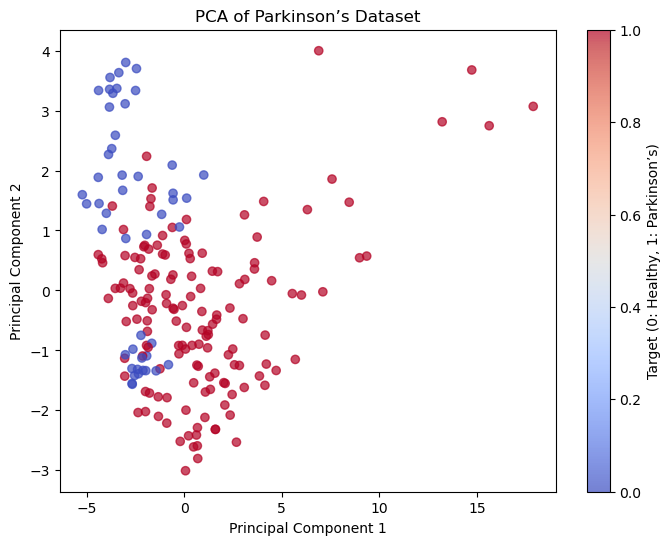

In [41]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Target'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Parkinson’s Dataset')
plt.colorbar(label='Target (0: Healthy, 1: Parkinson’s)')
plt.show()


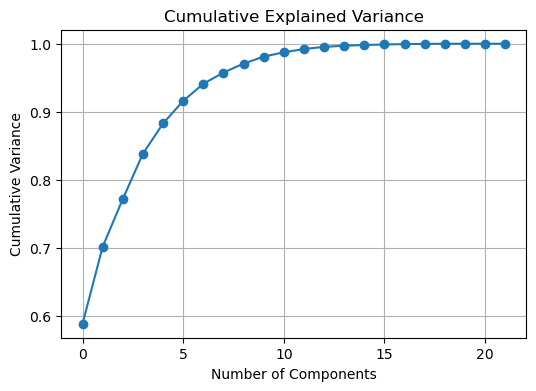

In [39]:
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()

In [37]:
# Analyze PCA separation
def analyze_pca_separation(X_pca, y):
    parkinsons = X_pca[y == 1]
    healthy = X_pca[y == 0]
    
    separation_score = np.linalg.norm(np.mean(parkinsons, axis=0) - np.mean(healthy, axis=0))
    print(f"Separation Score (Euclidean Distance between class centers): {separation_score:.4f}")
    
    if separation_score > 2:
        print("PCA provides good separation between healthy and Parkinson’s-affected individuals.")
    else:
        print("PCA does not provide strong separation. Consider more features or another method.")

# Run analysis
analyze_pca_separation(X_pca, y)


Separation Score (Euclidean Distance between class centers): 3.7784
PCA provides good separation between healthy and Parkinson’s-affected individuals.
